In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import binom
from scipy.stats import norm
import statsmodels.stats.api as sms
import plotly.express as px
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import plots
import scipy.stats as scs

from methods import Mymethods
import utility_functions as ut
import plots
import scripts


In [4]:
CSV_PATH = "../data/data.csv"

In [5]:
methods = Mymethods()

data reading


In [6]:
df = methods.read_csv(CSV_PATH)
df.head()

>> file succesfully read as csv


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [7]:
print(f"number of rows: {df.shape[0]}")
print(f"number of cols: {df.shape[1]}")

df.info()

number of rows: 8077
number of cols: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [8]:
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 8077 rows and 9 columns


In [9]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


checking if there are null values in the table

In [10]:
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

checking for missing values

In [11]:
ut.percent_missing(df)

The dataset contains 0.0 % missing values.


In [12]:
true_results= df.groupby('experiment').agg({'yes': 'sum','no': 'sum'})
true_results.sort_values(by=['yes','no'], ascending=False)

,yes,no
experiment,,
exposed,308,349
control,264,322


<AxesSubplot:xlabel='experiment'>

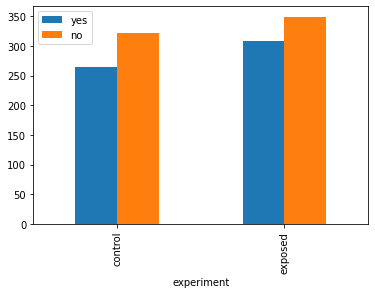

In [13]:
true_results.plot.bar()

In [14]:
true_results.describe()

,yes,no
count,2.000000,2.000000
mean,286.000000,335.500000
std,31.112698,19.091883
min,264.000000,322.000000
25%,275.000000,328.750000
50%,286.000000,335.500000
75%,297.000000,342.250000
max,308.000000,349.000000


Examining for browser results

In [15]:
browser_metrics = df.groupby('browser').agg({'yes': 'sum','no': 'sum'})
browser_metrics.sort_values(by=['yes','no'], ascending= False )

,yes,no
browser,,
Chrome Mobile,314,381
Chrome Mobile WebView,116,111
Facebook,69,87
Samsung Internet,67,78
Mobile Safari,4,10
Chrome,1,1
Chrome Mobile iOS,1,0
Mobile Safari UI/WKWebView,0,3
Android,0,0


<AxesSubplot:xlabel='browser'>

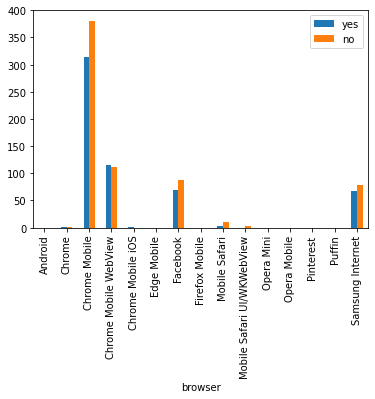

In [16]:
browser_metrics.plot.bar()

In [17]:
df_browser = df[['browser']].head(10)

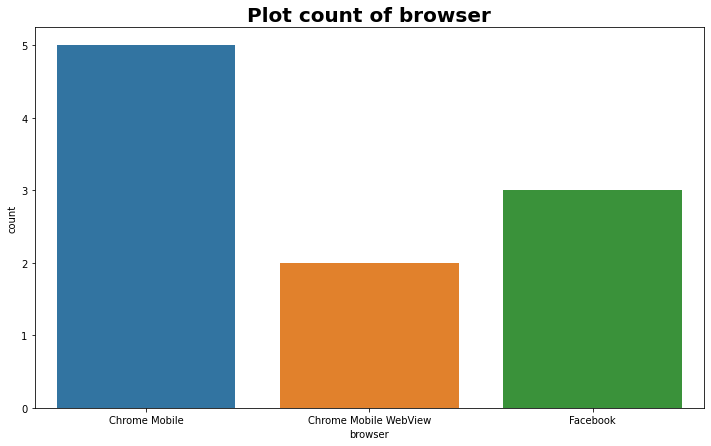

In [18]:
plots.plot_count(df_browser,'browser')

looking for devices

In [19]:
users_devices = df.groupby('device_make').agg({'yes': 'sum','no': 'sum'})
users_devices.sort_values(by=['yes','no'], ascending=False)

,yes,no
device_make,,
Generic Smartphone,321,398
Samsung SM-G960F,21,24
Samsung SM-G950F,16,19
Samsung SM-G930F,11,5
Samsung SM-G973F,10,12
...,...,...
XiaoMi Redmi Note 8,0,0
XiaoMi Redmi Note 8 Pro,0,0
XiaoMi Redmi Note 8T,0,0


In [20]:
users_devices.describe()

,yes,no
count,270.000000,270.000000
mean,2.118519,2.485185
std,19.627404,24.296759
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,321.000000,398.000000


looking for the potential effects of operating systems in the users' devices

In [21]:
os_metrics = df.groupby('platform_os').agg({'yes': 'sum','no': 'sum'})
os_metrics.sort_values(by=['yes','no'], ascending=False)

,yes,no
platform_os,,
6,567,659
5,5,12
7,0,0


In [22]:
os_metrics.describe()

,yes,no
count,3.000000,3.000000
mean,190.666667,223.666667
std,325.923815,377.057467
min,0.000000,0.000000
25%,2.500000,6.000000
50%,5.000000,12.000000
75%,286.000000,335.500000
max,567.000000,659.000000


plotting the distribution of some of the columns

<Figure size 648x504 with 0 Axes>

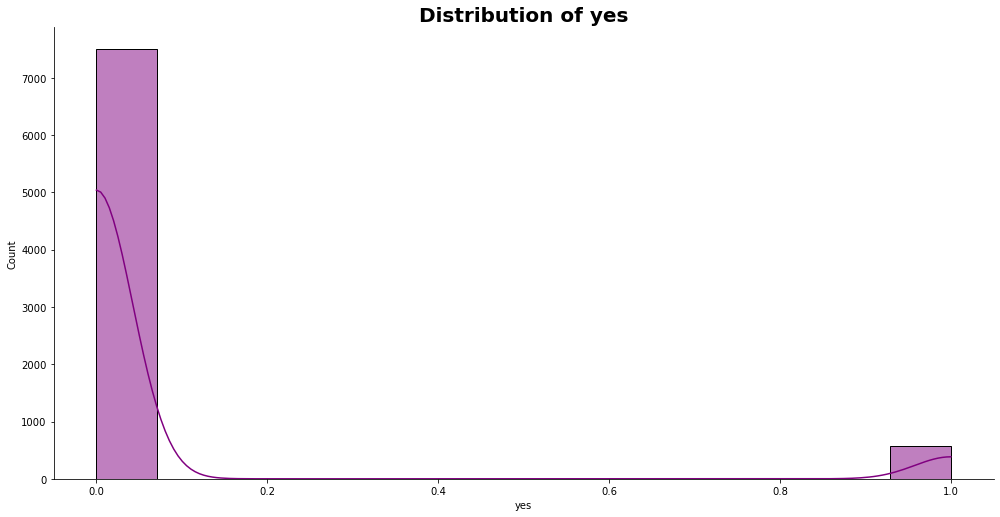

<Figure size 648x504 with 0 Axes>

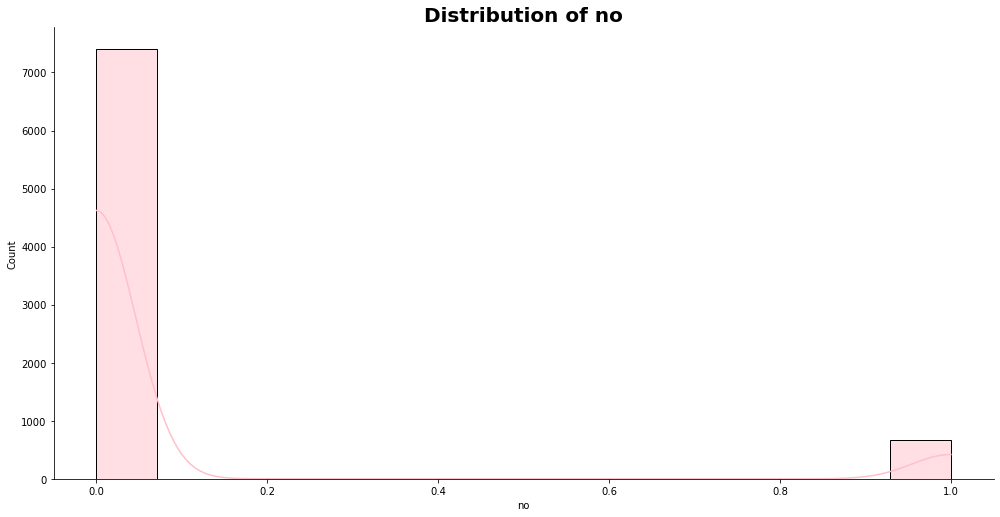

In [23]:
plots.plot_hist(df,'yes','purple')
plots.plot_hist(df,'no','pink')


<Figure size 648x504 with 0 Axes>

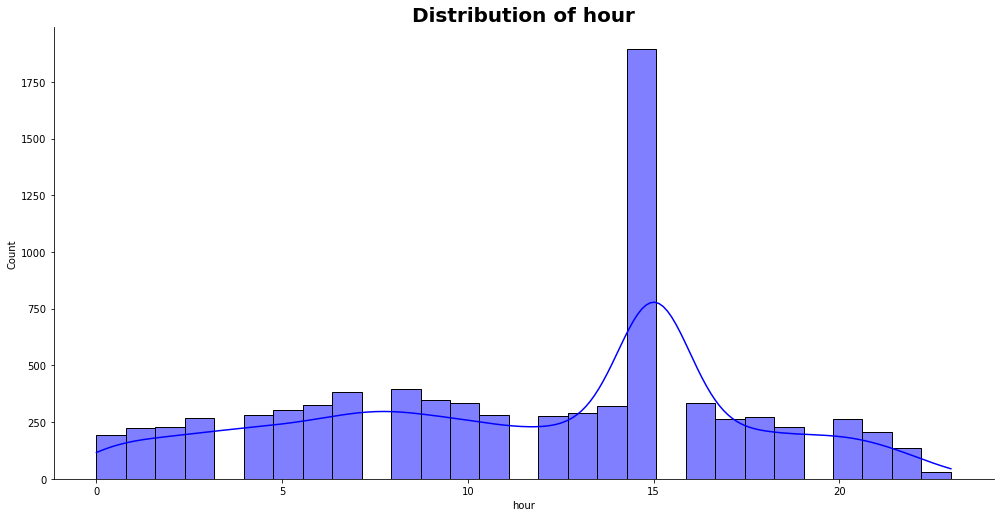

In [24]:
plots.plot_hist(df,'hour','blue')

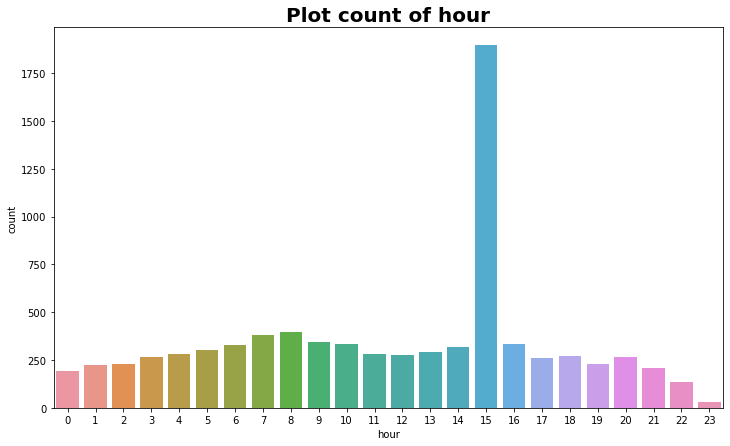

In [25]:
plots.plot_count(df,'hour')

In [26]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


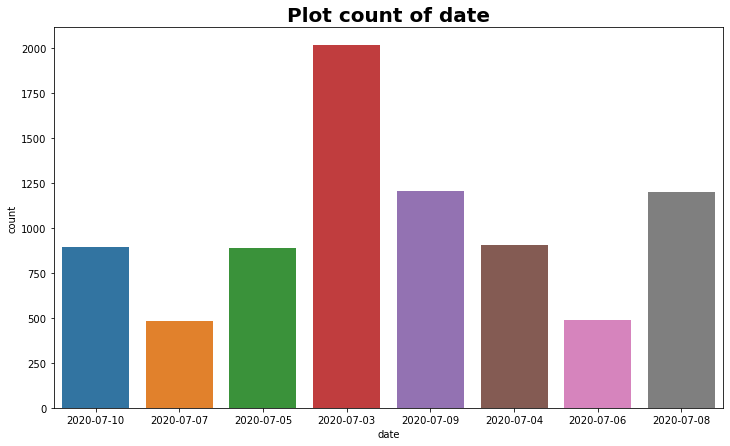

In [27]:
plots.plot_count(df,'date')

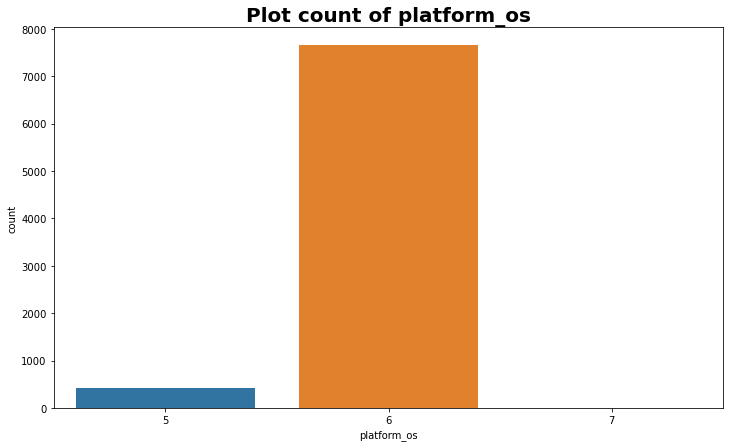

In [28]:
plots.plot_count(df,'platform_os')


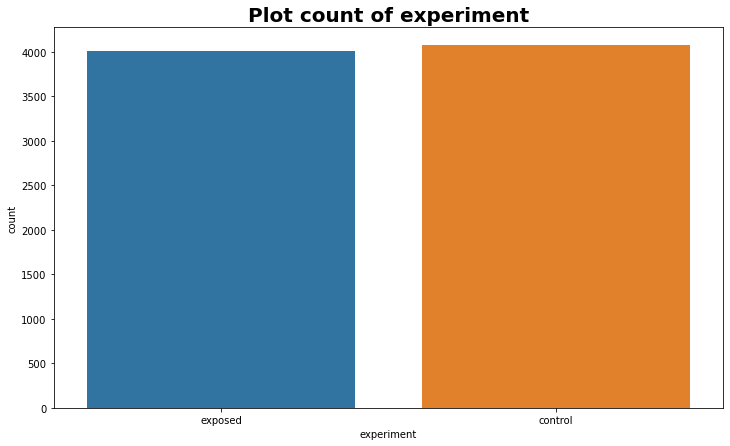

In [29]:
plots.plot_count(df,'experiment')

The experiment seems to be feasible as there are almost equal number of people in the controlled and exposed section 

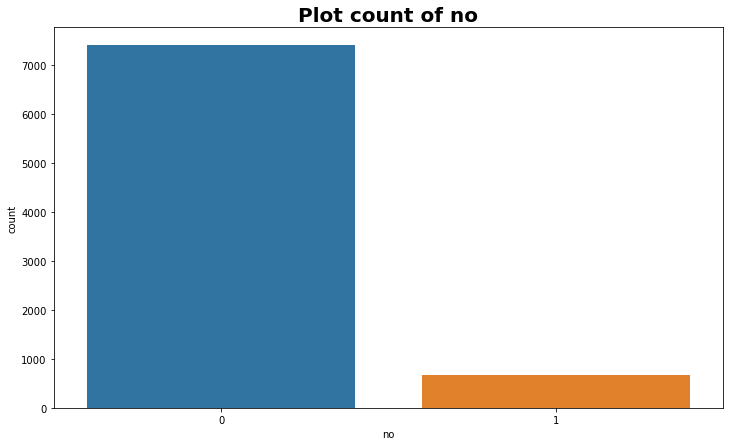

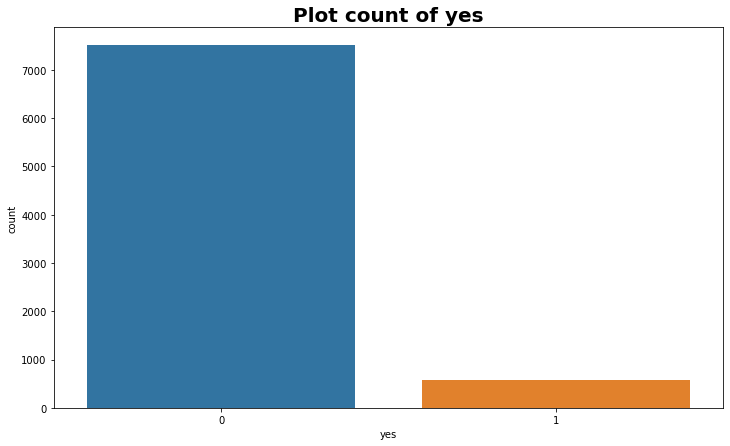

In [30]:
plots.plot_count(df,'no')
plots.plot_count(df,'yes')

<Figure size 648x504 with 0 Axes>

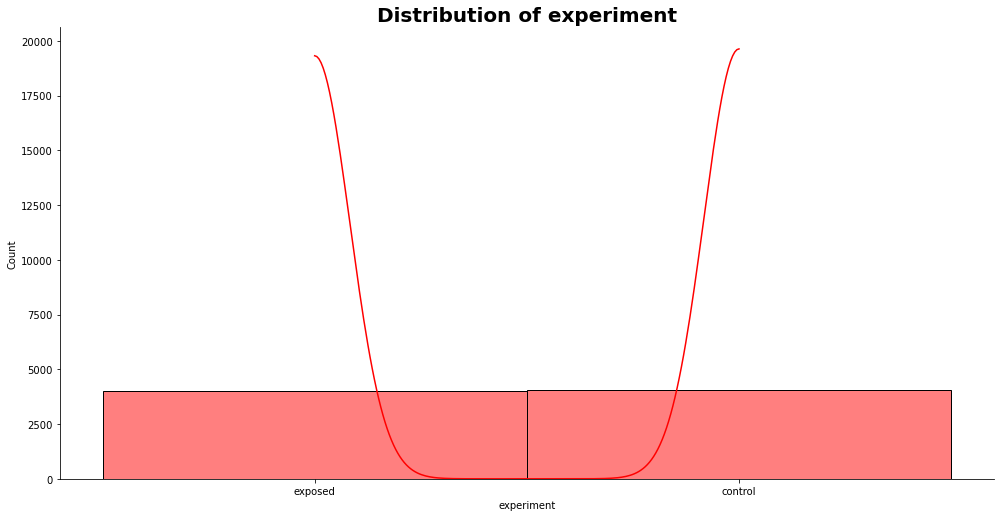

In [31]:
plots.plot_hist(df,'experiment','red')

The column hour seems to be different in its distribution function. There seems to be a spike at value '15'. that will b

In [32]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [33]:
# Drop observations where users didn't respond to the questionaire
drop_mask = df.query('yes==0 and no==0')

In [34]:
data_frame=df.drop(drop_mask.index)

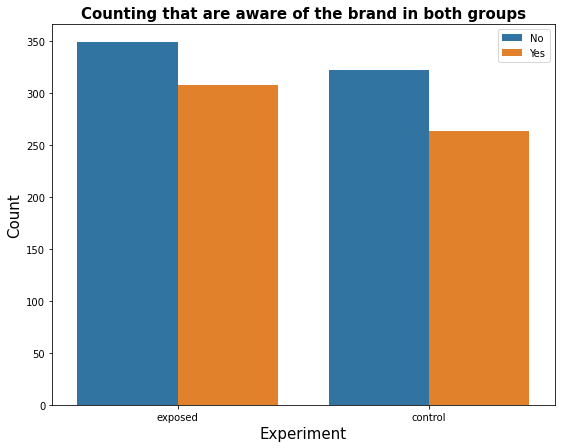

In [35]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x ='experiment', hue='yes', data = data_frame) 

ax.set_xlabel('Experiment', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Counting that are aware of the brand in both groups', fontsize=15, fontweight='bold')
plt.legend( ['No', 'Yes'])

Text(0.5, 1.0, 'Count of Browsers used')

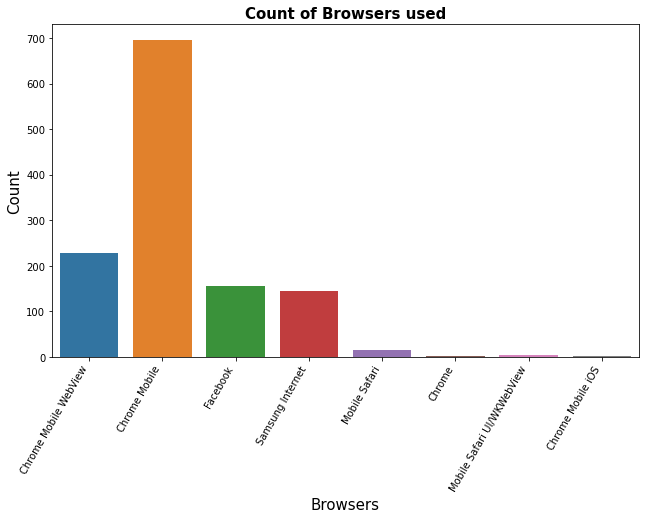

In [48]:
# chrome is dominant
plt.figure(figsize=(9,7))
ax= sns.countplot(x ='browser', data = data_frame) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
ax.set_xlabel('Browsers', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Count of Browsers used', fontsize=15, fontweight='bold')

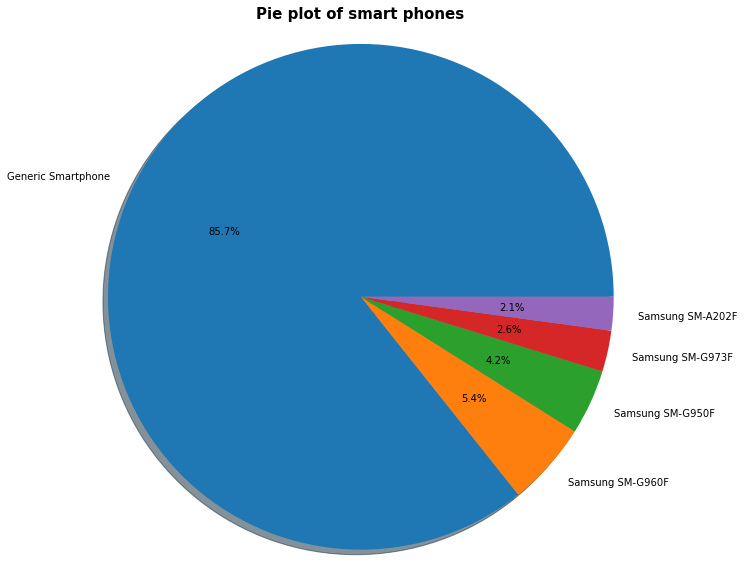

In [37]:
top_5_device= data_frame['device_make'].value_counts().nlargest(5)
fig1, ax1 = plt.subplots(figsize = (10, 10))
ax1.pie(top_5_device.values, labels=top_5_device.index, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')

ax1.set_title('Pie plot of smart phones', fontsize=15, fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Distribution of Hour')

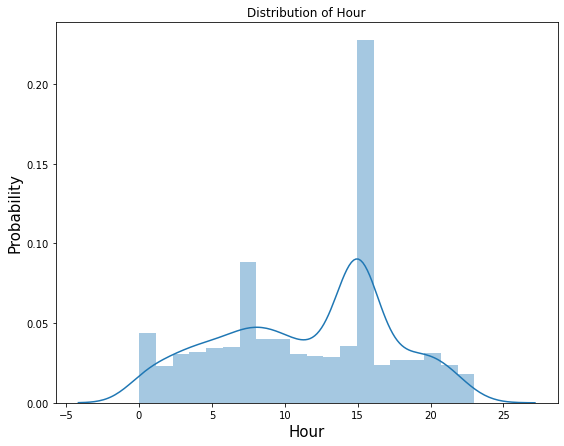

In [38]:
plt.figure(figsize=(9,7))
top_5_device= data_frame['device_make'].value_counts().nlargest(5)
ax=sns.distplot(data_frame['hour'],bins=20) 

ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Probability' , fontsize=15)
plt.title('Distribution of Hour')

In [39]:
exposed_yes = data_frame.query('experiment == "exposed"').yes
exposed_count = len(exposed_yes)
exposed_yes_count = exposed_yes.sum(axis=0)

control_yes = data_frame.query('experiment == "control"').yes
control_count = len(control_yes)
control_yes_count = control_yes.sum(axis=0)
print('Converted Control:',control_yes_count,'    Total Control:',control_count)
print('Converted Exposed:',exposed_yes_count,'    Total Exposed:',exposed_count)

Converted Control: 264     Total Control: 586
Converted Exposed: 308     Total Exposed: 657


In [42]:
baseline_rate = control_yes_count / control_count
practical_significance = 0.01 
confidence_level = 0.05 
sensitivity = 0.8 

effect_size = sms.proportion_effectsize(baseline_rate, baseline_rate + practical_significance)
sample_size = sms.NormalIndPower().solve_power(effect_size = effect_size, power = sensitivity, 
                                               alpha = confidence_level, ratio=1)
print("The Required sample size: ", round(sample_size), " per group")

Required sample size:  38932  per group


as we can see more data should be collected to satisfy the requirement figure


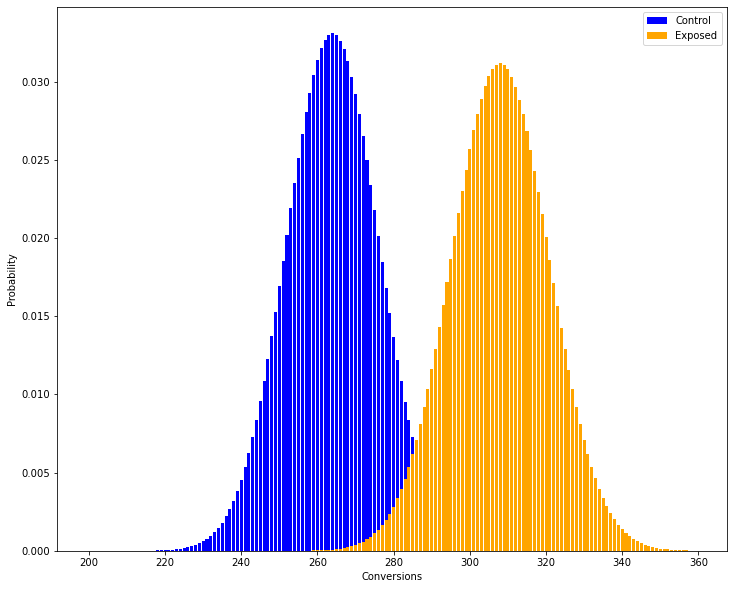

In [43]:
cv_rate_control, cv_rate_exposed = control_yes_count / control_count, exposed_yes_count / exposed_count
range = np.arange(200, 360)
cv_prob_control = binom(control_count, cv_rate_control).pmf(range)
cv_prob_exposed = binom(exposed_count, cv_rate_exposed).pmf(range)
fig, ax = plt.subplots(figsize=(12,10))
plt.bar(range, cv_prob_control, label="Control",color='blue')
plt.bar(range, cv_prob_exposed, label="Exposed",color='orange')
plt.legend()
plt.xlabel("Conversions"); plt.ylabel("Probability");

The exposed group looks to have gained some advantage from the above graph

Calculate standard deviations for each experiment group. This will help us change our binomial distribution to normal by using the central limit theorem. We can then calculate z-scores.

In [52]:
std_dev_control = np.sqrt(cv_rate_control * (1 - cv_rate_control) / control_count)
std_dev_exposed = np.sqrt(cv_rate_exposed * (1 - cv_rate_exposed) / exposed_count)

Calculate conversion rates for each experiment group and plot the probability distribution¶


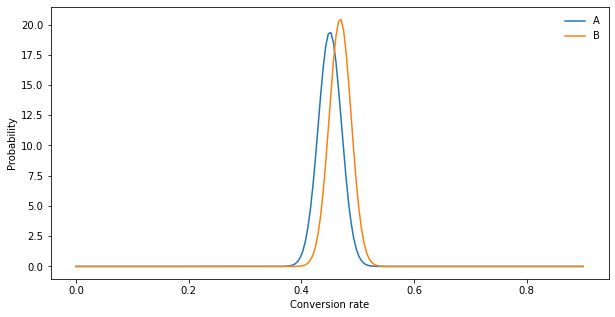

In [53]:
conversion_rate = np.linspace(0, 0.9, 200)
prob_a = norm(cv_rate_control, std_dev_control).pdf(conversion_rate)
prob_b = norm(cv_rate_exposed, std_dev_exposed).pdf(conversion_rate)
plt.figure(figsize=(10,5))
plt.plot(conversion_rate, prob_a, label="A")
plt.plot(conversion_rate, prob_b, label="B")
plt.legend(frameon=False)
plt.xlabel("Conversion rate"); plt.ylabel("Probability");

We can see here that the exposed group looks to have an advantadge over the controlled one 

##Determing the z and p values

zscore is 0.646, with p-value 0.259


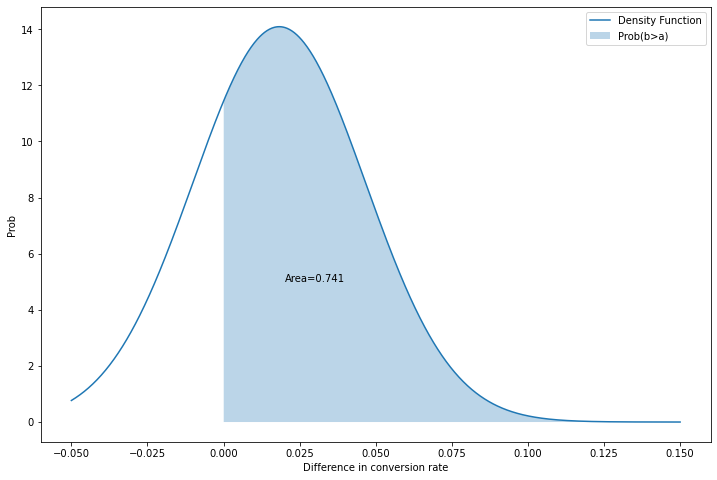

In [54]:
z_score = (cv_rate_exposed - cv_rate_control) / np.sqrt(std_dev_control**2 + std_dev_exposed**2)
p = norm(cv_rate_exposed - cv_rate_control, np.sqrt(std_dev_control**2 + std_dev_exposed**2))

x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.figure(figsize=(12,8))
plt.plot(x, y, label="Density Function")
plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in conversion rate"); plt.ylabel("Prob");

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

Conclusuion

In [ ]:
- Since the p-value(0.259)>0.05, the null hypothesis will be taken as true.

-However, this testing doesnt give any guarantee if there can be other factors that can potentially alter the results 
in the exposed group. This is mainly because the required data amount numbers havent been satisfied